## Project 2
**PHY4905: Computational Physics**  
**Spring 2022**  
**Author: Sabahattin Mert Daloglu, Alen Zacharia**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi, sin, cos, ceil

G = 6.67408*1e-11
m1 = 10e10    #Mass of Galaxy 1
m2 = 10e10    #Mass of Galaxy 2
M = m1 + m2    #Total mass
mu = (m1+m2)/M    #Reduced mass


def F(d,n):
    """
    inputs:
    - d: 1D array with elements x1, y1, x1_dot, y1_dot, x2, y2, x2_dot, y2_dot, xi, yi, xi_dot, yi_dot...
    - n: is the number of massless particles around a galaxy
    
    outputs:
    - 1D array output of the time derivative of the aforementioned elements
    """
    
    d = d.reshape(2+n,4)    #reshaping 1D state array to a 2D state array
    
    r = np.sqrt(np.power(d[1][0] - d[0][0], 2) + np.power(d[1][1] - d[0][1], 2))   #Distance between the galaxies
    
    # Derivatives for Galaxy1
    f_x1 = d[0][2]
    f_y1 = d[0][3]
    f_vx1 = -((G*m2)/np.power(r, 3)) * (d[0][0] - d[1][0])    #EoM for Galaxy1 - in x direction
    f_vy1 = -((G*m2)/np.power(r, 3)) * (d[0][1] - d[1][1])    #EoM for Galaxy1 - in y direction
    
    # Derivatives for Galaxy2
    f_x2 = d[1][2]
    f_y2 = d[1][3]
    f_vx2 = -((G*m1)/np.power(r, 3)) * (d[1][0] - d[0][0])    #EoM for Galaxy1 - in x direction
    f_vy2 = -((G*m1)/np.power(r, 3)) * (d[1][1] - d[0][1])    #EoM for Galaxy1 - in y direction
    
    f_d = []    # 1D array to store derivative states of both galaxies and massless particles
    
    f_d1 = np.array([f_x1, f_y1, f_vx1, f_vy1], float)   #Derivative states array for Galaxy1
    f_d = np.append(f_d,f_d1)    
    f_d2 = np.array([f_x2, f_y2, f_vx2, f_vy2], float)   #Derivative states array for Galaxy1
    f_d = np.append(f_d,f_d2)
    
    # Derivatives for the massless particles
    for i in range(2, np.shape(d)[0]):
        
        #Distance between a massless particle and Galaxy1
        r1i = np.sqrt(np.power(d[i][0] - d[0][0], 2) + np.power(d[i][1] - d[0][1], 2))
        
        #Distance between a massless particle and Galaxy1
        r2i = np.sqrt(np.power(d[i][0] - d[1][0], 2) + np.power(d[i][1] - d[1][1], 2))
        f_xi = d[i][2]
        f_yi = d[i][3]
        
        #EoM for a massless particle - in x direction
        f_vxi = -((G*m1)/np.power(r1i, 3)) * (d[i][0] - d[0][0]) - ((G*m2)/np.power(r2i, 3)) * (d[i][0] - d[1][0])
        
        #EoM for a massless particle - in y direction
        f_vyi = -((G*m1)/np.power(r1i, 3)) * (d[i][1] - d[0][1]) - ((G*m2)/np.power(r2i, 3)) * (d[i][1] - d[1][1])
        
        f_di = np.array([f_xi, f_yi, f_vxi, f_vyi], float) #Derivative states array for massless particles
        f_d = np.append(f_d,f_di)
   
    return f_d    #1D array output of the derivative states of Galaxy1, Galaxy2, massless particle(s)_i...

def rk4(f,t0,t1,h,d_0,n):
    """
    4th-order Runge_Kutta method
    inputs:
    - f: ODE function
    - t0: initial time
    - t1: final time
    - h = step size for Runge Kutta
    - d_0: 1D array with initial states of Galaxy1, Galaxy2, and massless particles(s)_i
    - n: number of massless particles around a galaxy
    
    outputs:
    - Time steps 
    - 3D array of states over time 
    """
    ri = d_0
    rf = np.array([ri])
    t = np.arange(t0,t1+h,h)
    
    for ti in t[:-1]:
        k1 = h*f(ri,n)
        k2 = h*f(ri+0.5*k1,n)
        k3 = h*f(ri+0.5*k2,n)
        k4 = h*f(ri+k3,n)
        ri += (k1 + 2*k2 + 2*k3 + k4)/6
        rf = np.append(rf,np.array([ri]),axis=0)
    
    return t,rf

def leap_frog(f,t0,tf,h,d_0,n):
    """
    Leap frog method
    inputs:
    - f: ODE function
    - t0: initial time
    - t1: final time
    - h = step size for Runge Kutta
    - d_0: 1D array with initial states of Galaxy1, Galaxy2, and massless particles(s)_i
    - n: number of massless particles around a galaxy
    
    outputs:
    - Time steps 
    - 3D array of states over time 
    """
    

    t = np.arange(t0, tf+h, h)
    
    ri = d_0    #1 dimensional state array
    rf = np.array([ri], float)    #2 dimensional
    
    
    for j in range(n+2):
            f_r = f(ri, n)
            ri[j*4+2] += h/2*f_r[j*4+2]
            ri[j*4+3] += h/2*f_r[j*4+3]
    
    for i in t[1:]:
        rf = np.append(rf,np.array([ri]),axis=0)
        for j in range(n+2):
            ri[j*4] += h * ri[j*4+2]
            ri[j*4+1] += h* ri[j*4+3]
            f_r = f(ri, n)
            ri[j*4+2] += h*f_r[j*4+2]
            ri[j*4+3] += h*f_r[j*4+3]

    return t, rf

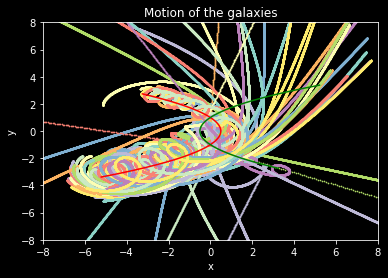

The standard deviation of the total energy is  0.12063783163687722
0.86


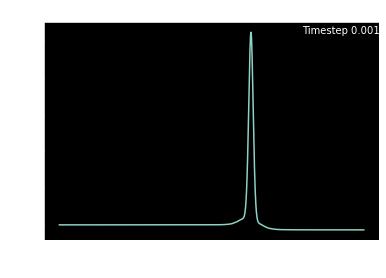

<Figure size 720x720 with 0 Axes>

In [4]:
def analysis(e, n, h, t0, t1, r_min = 1, gif=True):
    """
    inputs:
    - e: is the eccentricity of the orbit
    - n: is the number of massless particles around a galaxy
    - h: is the stepsize used for the simulation
    - t0: is the starting time
    - t1: is the final time 
    - r_min: the distance of closest aproach (default 1)
    - gif: If True records position of the system over time as png files and 
           saves them in the 'test_snaps' directory to make a gif
       *** Note that to produce a gif 'make_gif.ipynb' notebook should be 
           run after running this notebook
    
    outputs:
    - Plots the motion of two body system with massless particles
    - Saves png files for every time step to 'test_snaps' directory to make a gif
    """ 
    
    
    phi_0 = 10    #Initial condition for the orbit angle
    T = 10    #Orbital period

    a = (G*M*(T**2)/(4*(pi**2)))**(1/3)    #semi-major axis
    
    
    if 0<=e<1:    #Elliptical orbit
        p = a*(1-(e**2))    #semi-latus rectum  
    elif e == 1:    #Parabolic orbit
        p = 2*r_min    #semi-latus rectum
        
    r_0 = p/(1 + e*cos(phi_0))    #Initial condition for r
    phi_dot_0 = np.sqrt(G*M*p) / np.power(r_0, 2)    #Initial condition for phi_dot_0
    r_dot_0 = (e * np.power(r_0, 2) * np.sin(phi_0) * phi_dot_0 )/ p    #Initial condition for r_dot_0
    
    
    #Finding the coordinates of the galaxies from the coordinates of the reduced mass
    #The mass/distance ratio is used since Galaxy1, Galaxy2, and proxy(reduced mass) are collinear
    r1_0 = r_0*m2/M
    r2_0 = -r_0*m1/M
    r1_dot_0 = r_dot_0*m2/M
    r2_dot_0 = -r_dot_0*m1/M
    
    #Converting polar coordinates to cartesian coordinates for Galaxy1
    x1_0 = r1_0*np.cos(phi_0)
    y1_0 = r1_0*np.sin(phi_0)
    x1_dot_0 = r1_dot_0 * np.cos(phi_0) - phi_dot_0 * r1_0*np.sin(phi_0)
    y1_dot_0 = r1_dot_0 * np.sin(phi_0) + phi_dot_0 * r1_0*np.cos(phi_0)  
    
    #Converting polar coordinates to cartesian coordinates for Galaxy2
    x2_0 = r2_0*np.cos(phi_0)
    y2_0 = r2_0*np.sin(phi_0) 
    x2_dot_0 = r2_dot_0 * np.cos(phi_0) - phi_dot_0 *r2_0*np.sin(phi_0)
    y2_dot_0 = r2_dot_0 * np.sin(phi_0) + phi_dot_0 *r2_0*np.cos(phi_0)
    
    d_0 = []    #Creating an empty state array (1D) for the inital states of both galaxies
    d1_0 = np.array([x1_0, y1_0, x1_dot_0, y1_dot_0], float)
    d_0 = np.append(d_0,d1_0)
    d2_0 = np.array([x2_0, y2_0, x2_dot_0, y2_dot_0], float)
    d_0 = np.append(d_0,d2_0)
    
    
    #Finding the initial states of massless particle(s)
    for i in range(n):
        phi_i0 = np.random.random()*2*pi    #randomly chosen direction
        e_i = 0    #all test particles have circular orbits
        T_i = np.random.random()*0.5*T + 1  #Orbital period is defined relative to orbital period of the Galaxy1
        a_i = (G*m1*(T_i**2)/(4*(pi**2)))**(1/3)    #semi-major axis
        p_i = a_i    #semi-latus rectum  
        ri_0 = p_i    #since eccentricity is 0
        
        #Setting up the initial conditions
        phi_dot_0_i = np.sqrt(G*m1*p_i) / np.power(ri_0, 2)
        r_dot_0_i = e_i * np.power(ri_0, 2) * np.sin(phi_i0) * phi_dot_0_i / p_i
        
        #Placing the massless particles around the first galaxy
        xi_0 = ri_0*np.cos(phi_i0) + x1_0
        yi_0 = ri_0*np.sin(phi_i0) + y1_0
        xi_dot_0 = r_dot_0_i * np.cos(phi_i0) - phi_dot_0_i * ri_0*np.sin(phi_i0) + x1_dot_0
        yi_dot_0 = r_dot_0_i * np.sin(phi_i0) + phi_dot_0_i * ri_0*np.cos(phi_i0) + y1_dot_0
        di_0 = np.array([xi_0, yi_0, xi_dot_0, yi_dot_0], float)
        d_0 = np.append(d_0,di_0)
    
    #Select the integration method to use
    t,rf = rk4(F,t0,t1,h,d_0,n)
    #t, rf = leap_frog(F,t0,t1,h,d_0,n)
    
    #Reshape rf into a 3D array of states across time
    nt = t.size    #Number of timesteps(depth of time dimension)
    rf = rf.reshape(nt,n+2,4)
    
    #Splice rf into the states at each time for just the two galaxies
    x1 = rf[:,0,0]
    y1 = rf[:,0,1]
    vx1 = rf[:,0,2]
    vy1 = rf[:,0,3]
    x2 = rf[:,1,0]
    y2 = rf[:,1,1]
    vx2 = rf[:,1,2]
    vy2 = rf[:,1,3]
    
    #Plotting the paths of all objects
    for i in range(n):
            plt.scatter(rf[:,i+2,0],rf[:,i+2,1],s=0.5)    #Plots all particles
    plt.plot(x1,y1,c='r')    #Plots first galaxy
    plt.plot(x2,y2,c='g')    #Plots second galaxy
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Motion of the galaxies')
    plt.xlim(-8,8)
    plt.ylim(-8,8)
    plt.show()
    
    #Calculating the total energy at each timestep
    r = np.sqrt(np.power(x1 - x2, 2) + np.power(y1 - y2, 2))    #distance
    U = -G*m1*m2/r
    K = 0.5*(m1*(np.square(vx1) + np.square(vy1)) + m2*(np.square(vx2) + np.square(vy2)))
    E = K+U    #Array of energy values at each timestep
    
    plt.figure(facecolor='#FFFFFF')
    plt.plot(t,E)
    plt.xlabel('t')
    plt.ylabel('E')
    plt.title('Total Energy')
    plt.annotate('Timestep ' + str(h), xy=(0.77, 0.95),  xycoords='axes fraction')
    plt.savefig('Energy')
    print("The standard deviation of the total energy is " ,sqrt(np.var(E)))
 
    
    def saveSnapshot(ti, skip):
        """
        Saves snapshots of a given time ti to folder test_snaps
        inputs:
        - ti: index of the time we want to plot
        - skip: number of timesteps skipped (needed to format the file name)
        """
        #Plots two galaxies and their paths until ti
        plt.scatter(x1[ti],y1[ti],c='r')
        plt.plot(x1[:ti+1],y1[:ti+1],'--', c='r', alpha = 0.5)
        plt.scatter(x2[ti],y2[ti],c='g')
        plt.plot(x2[:ti+1],y2[:ti+1],'--', c='g', alpha=0.5)
        
        for i in range(n):
            #Plots all particles as a white dot
            plt.scatter(rf[ti,i+2,0],rf[ti,i+2,1],s=1.5, c = 'w')

        #Bounds for the image
        plt.xlim(-15,15)
        plt.ylim(-15,15)
        plt.axis('off')
        #plt.axis('equal')
        
        numString = str(int(ti/skip))    #Name of the image
        
        #Saving the image with the proper name
        if len(numString) == 1:
            plt.savefig("test_snaps/snapshot_000" + numString + ".png", bbox_inches='tight',pad_inches = 0)
        elif len(numString) == 2:
            plt.savefig("test_snaps/snapshot_00" + numString + ".png", bbox_inches='tight',pad_inches = 0)
        elif len(numString) == 3:
            plt.savefig("test_snaps/snapshot_0" + numString + ".png", bbox_inches='tight',pad_inches = 0)
        elif len(numString) == 4:
            plt.savefig("test_snaps/snapshot_" + numString + ".png", bbox_inches='tight',pad_inches = 0)
            
        plt.clf()    #Clears the plot for the next image to be saved
    
    skip = 50    #Skip this many timesteps at a time when making gif (1 if none)
    if gif == True:
        plt.figure(figsize=(10,10))
        plt.style.use('dark_background')    #Makes the background black
        for ti in range(len(t)):
            if ti%skip == 0:
                saveSnapshot(ti, skip)
                
    
    launched = 0
    maxDist = (G*m1*((T*0.5)**2)/(4*(pi**2)))**(1/3)
    for i in range(n):
        dist = np.sqrt(np.square(rf[-1,i+2,0] - rf[-1, 0, 0]) + \
                       np.square(rf[-1,i+2,1] - rf[-1, 0, 1]))
        if dist > maxDist:
            launched += 1
    print(launched/n)
    
analysis(e = 1, n = 50, h = 0.001, t0 = 0, t1 = 10, r_min = 1, gif=True)